# Introduction <a class="anchor" id="0"></a>

In 2016, I have purchased a Samsung Galaxy S6 smartphone. Thanks to the preinstalled app "Samsung Health", I was able to track my daily number of steps and burned calories. This was very helpful because I was a very active student then. Six years later, in 2022, I am still using the app but my daily life has significantly changed as I am now working as a data analyst, sitting at my desk almost all day long. This made me wonder :

* In 6 years, how many steps did I make in total ? 
* What year was I the most active ?
* How did my exercice habits change over time in terms of frequency and intensity of workouts ?

But since I do not own a smartwatch, only running and hiking activities are tracked. For instance, my swimming and dance workouts are not recorded in my Samsung Health data. Thus, I wanted to combine both my Samung Health *AND* Google Maps History Location data to:
* Get a full perspective on my workout activities (running, hiking, swimming and dancing)
* Link my geographical data to my workouts. The aim was to identify the places where I did long hikes for instance.

Because importing and cleaning the data was quite tedious for both data sources, the present Python code will focus only on the merging process of datasets. However, you may get more details on the preparation of each data source here : 
* [Samsung Health pedometer data](https://github.com/MargotMarchais/Samsung_Health_analysis)
* [Google Maps History Location data (public version)](https://github.com/MargotMarchais/Google_Maps_Swimming_Dance_workouts)


# Table of contents
* [Introduction](#0)
* [1.  Importing the cleaned Samsung Health and Google Maps History Location data as Pandas dataframes](#1)
 * [1.0. Python packages](#1.0)
 * [1.1. Samsung Health cleansed data](#1.1)
 * [1.2. Google Maps History Location cleansed data](#1.2)
* [2. Merging datasets](#2)
 * [2.1. Merging the swim and dance workouts to the pedometer data](#2.1)
 * [2.2. Merging the location history data to the pedometer data](#2.2)
* [3. Data cleaning and preparation](#3)
* [4. Insights from data visualization](#4)
 * [4.1. I burn on average 300 kcal / a day, with 400 to 500 kcal peaks in 2021 and 2022](#4.1)
 * [4.1. Hiking is my main cause of burned calories](#4.2)

# 1. Importing the cleaned Samsung Health and Google Maps History Location data as Pandas dataframes <a class="anchor" id="1"></a>

## 1.0. Packages that will be used  <a class="anchor" id="1.0"></a>

In [1]:
# Importing the relevant Python packages for the case study
import pandas as pd
import numpy as np

    # Dates focus
import datetime
from pandas.tseries.offsets import MonthEnd

    # Data viz focus
import matplotlib.pyplot as plt
import seaborn as sns
import string

    # Notebook format
from IPython.display import Image
from IPython.core.display import HTML

## 1.1. Samsung Health cleansed data  <a class="anchor" id="1.1"></a>


* *Structure*: Data are stored as a csv file ("Python_output") and contains 19 columns.
* *Information available* : The dataset provides information about my daily number of steps and calories burned.  <br>
* *Data granularity*: The information are summarized for each day in the dataset, with no duplicates. There are 2,139 rows (about 6 years of data).
* *Github repository detailing data preparation*: [Samsung Health pedometer data](https://github.com/MargotMarchais/Samsung_Health_analysis)

In [2]:
# Data import and glimpse
pedometer = pd.read_csv('C:/Users/margo/Documents/Documents/Formation/Github/Samsung_Health/pedometer_data.csv',
                index_col = False)

print(pedometer.shape)
pedometer.sort_values("clean_date", ascending = False).head(5)

(2139, 19)


,Unnamed: 0,clean_date,recommendation,step_count,walk_step_count,run_step_count,distance,calorie,distance_km,year,month,week,month_number,week_number,day_number,weekday,steps_thousand,walk_steps_thousand,run_steps_thousand
2138,4303,2022-10-09,7000,239,239,0,167.84999,8.299999,0.167850,2022,2022-10,2022-40,10,40,9,Sunday,0.239,0.239,0.000
2137,4301,2022-10-08,7000,9310,9304,6,6753.90040,289.839970,6.753900,2022,2022-10,2022-40,10,40,8,Saturday,9.310,9.304,0.006
2136,4299,2022-10-07,7000,15038,15038,0,10966.27050,460.599980,10.966271,2022,2022-10,2022-40,10,40,7,Friday,15.038,15.038,0.000
2135,4297,2022-10-06,7000,7939,7929,10,5797.01070,246.019910,5.797011,2022,2022-10,2022-40,10,40,6,Thursday,7.939,7.929,0.010
2134,4295,2022-10-05,7000,10168,10163,5,7404.49070,310.759920,7.404491,2022,2022-10,2022-40,10,40,5,Wednesday,10.168,10.163,0.005


<div class="alert alert-block alert-info">
<b>Data understanding:</b> For each date ("clean date"), the following information are available: <br>
. Number of total steps ("step_count"), with a distinction between walk steps ("walk_step_count") and run steps ("run_step_count"). Information also available in thousand units. <br>
. Number of steps "recommended" from a health point of view
. Associated distance traveled during the day: in meters ("distance") and kilometers ("distance_km") <br>
. Number of calories burned during the day ("calorie") <br>
    
<em>Example on how to read the data: On October 5th 2022 (Wednesday), I reached 10,168 steps: I walked 10,163 steps and runned during 5 steps. In total, I thus walked 7.4 kms and burned 310 calories. This is more than the recommendation of 7,000 steps a day and I reached my goal of making 10,000+ steps a day. </em>

</div>

## 1.2. Google Maps History Location cleansed data <a class="anchor" id="1.2"></a>

There are 2 datasets to be imported:
* Dataset containing information about my swimming and dance workouts 
* Dataset providing the location where I was each day (excluding home and work)

### Dataset n°1 : Swim and dance workouts
* *Structure*: Data are stored as a csv file ("swim_dance_workouts.csv") and contains 3 columns.
* *Information available* : Dates when I went to the swimming pool or dance studio, and the duration of my workout as recorded by Google Maps. <br>
* *Data granularity*: The information are summarized for each day in the dataset, with no duplicates. There are only 165 rows because it records only the days I had a dance or swimming workout.
* *Github repository detailing data preparation*: [Google Maps History Location data (public version)](https://github.com/MargotMarchais/Google_Maps_Swimming_Dance_workouts)

In [3]:
# Data import and glimpse
swim_dance_workouts = pd.read_csv('C:/Users/margo/Documents/Documents/Formation/Github/Google_Maps_Location_History/swim_dance_workouts.csv',
                index_col = False)

print(swim_dance_workouts.shape)
swim_dance_workouts.sort_values("Date", ascending = False).head(5) 

(163, 3)


,Date,duration_minutes,Sports
162,2022-10-09,84.867500,SWIMMING
161,2022-10-08,64.052033,SWIMMING
160,2022-10-06,71.438317,SWIMMING
159,2022-09-29,63.130167,SWIMMING
158,2022-09-25,87.418450,SWIMMING


### Dataset n°2:
* *Structure*: Data are stored as a csv file ("final_data.csv") and contains 5 columns.
* *Information available* : The dataset provides information about the place I was the longest each day. <br>
* *Data granularity*: The information are summarized for each day in the dataset, with no duplicates. There are only 1388 rows because I excluded the dates that returned private information, such as my personal address or my work location.
* *Github repository detailing data preparation*: [Google Maps History Location data (public version)](https://github.com/MargotMarchais/Google_Maps_Swimming_Dance_workouts)

In [4]:
# Data import and glimpse
google_maps = pd.read_csv('C:/Users/margo/Documents/Documents/Formation/Github/Google_Maps_Location_History/day_zipcode.csv',
                index_col = False)

print(google_maps.shape)

google_maps.sort_values("Date", ascending = False).head(5)

(1209, 3)


,Date,Zipcode,City
1208,2022-11-20,75015,PARIS
1207,2022-11-18,75007,PARIS
1206,2022-11-13,75004,PARIS
1205,2022-11-12,60300,COURTEUIL
1204,2022-11-11,75015,PARIS


<div class="alert alert-block alert-info">
<b>Data understanding:</b> For each date, I return the address where I was the longest that day (excluding my personal and work addresses). If there are no rows a given day, it means I stayed mostly at home and/or at work, and I do not display such rows for privacy reasons.
    
<em>Example on how to read the data: On November 11th 2022, the place I visited the most was located on 174 RUE DE VAUGIRARD, 75015 PARIS, FRANCE. I stayed there for about 2 hours (120 minutes). </em>

</div>

# 2. Merging datasets  <a class="anchor" id="2"></a>

Methodology: I start from my Samsung Health pedometer data. My objective is to enrich the dataset by:
* Adding the swimming and dance workouts information, and some estimated burned calories
* Adding the city where I was when I had long hikes

## 2.1. Merging the swim and dance workouts to the pedometer data <a class="anchor" id="2.1"></a>

In [5]:
# Methodology : Left join
sports_data = pedometer.merge(swim_dance_workouts, left_on = "clean_date", right_on = "Date", how = "left")
sports_data.sort_values("clean_date", ascending = False).head(5)

,Unnamed: 0,clean_date,recommendation,step_count,walk_step_count,run_step_count,distance,calorie,distance_km,year,...,month_number,week_number,day_number,weekday,steps_thousand,walk_steps_thousand,run_steps_thousand,Date,duration_minutes,Sports
2138,4303,2022-10-09,7000,239,239,0,167.84999,8.299999,0.167850,2022,...,10,40,9,Sunday,0.239,0.239,0.000,2022-10-09,84.867500,SWIMMING
2137,4301,2022-10-08,7000,9310,9304,6,6753.90040,289.839970,6.753900,2022,...,10,40,8,Saturday,9.310,9.304,0.006,2022-10-08,64.052033,SWIMMING
2136,4299,2022-10-07,7000,15038,15038,0,10966.27050,460.599980,10.966271,2022,...,10,40,7,Friday,15.038,15.038,0.000,NaN,NaN,NaN
2135,4297,2022-10-06,7000,7939,7929,10,5797.01070,246.019910,5.797011,2022,...,10,40,6,Thursday,7.939,7.929,0.010,2022-10-06,71.438317,SWIMMING
2134,4295,2022-10-05,7000,10168,10163,5,7404.49070,310.759920,7.404491,2022,...,10,40,5,Wednesday,10.168,10.163,0.005,NaN,NaN,NaN


<div class="alert alert-block alert-success">
<b>Success:</b> The sports column and workout durations were added to the Samsung Health pedometer data. <br>
    <em>Example: On October 5th, 2022 I made 10,168 steps in total and I did not do any dance nor swimming workout. On October 6th, 2022 though I walked 7,939 steps and had a swim workout. I stayed at the swimming pool for about 70 minutes.</em>
</div>

## 2.2. Merging the location history data to the pedometer data <a class="anchor" id="2.2"></a>

In [6]:
full_data = sports_data.merge(google_maps, left_on = "clean_date", right_on= "Date", how = "left")
full_data.sort_values("clean_date", ascending = False).head(5)

,Unnamed: 0,clean_date,recommendation,step_count,walk_step_count,run_step_count,distance,calorie,distance_km,year,...,weekday,steps_thousand,walk_steps_thousand,run_steps_thousand,Date_x,duration_minutes,Sports,Date_y,Zipcode,City
2138,4303,2022-10-09,7000,239,239,0,167.84999,8.299999,0.167850,2022,...,Sunday,0.239,0.239,0.000,2022-10-09,84.867500,SWIMMING,2022-10-09,75015,PARIS
2137,4301,2022-10-08,7000,9310,9304,6,6753.90040,289.839970,6.753900,2022,...,Saturday,9.310,9.304,0.006,2022-10-08,64.052033,SWIMMING,2022-10-08,75015,PARIS
2136,4299,2022-10-07,7000,15038,15038,0,10966.27050,460.599980,10.966271,2022,...,Friday,15.038,15.038,0.000,NaN,NaN,NaN,2022-10-07,75015,PARIS
2135,4297,2022-10-06,7000,7939,7929,10,5797.01070,246.019910,5.797011,2022,...,Thursday,7.939,7.929,0.010,2022-10-06,71.438317,SWIMMING,2022-10-06,75015,PARIS
2134,4295,2022-10-05,7000,10168,10163,5,7404.49070,310.759920,7.404491,2022,...,Wednesday,10.168,10.163,0.005,NaN,NaN,NaN,2022-10-05,75001,PARIS


<div class="alert alert-block alert-success">
<b>Success:</b> The zipcode / town information (excluding home and work addresses) was added to the dataset <br>
    <em>Example: On October 5th, 2022 I stayed mostly in 1st arrondissement of Paris. 
        On October 6th, 2022 I stayed mostly in the 15th arrondissement of Paris.</em>
</div>

# 3. Data preparation <a class="anchor" id="3"></a>

In [7]:
#Remove useless columns that appeared during merges
full_data = full_data.drop(columns = ["Date_x", "Date_y"])

In [8]:
# Step 1: Add burned calories from the dance and swimming workouts
    # Hypothesis: I will assume that I burn 300 calories/hour when dancing and 400 calories/hour when swimming
    
full_data["calories_swim_dance"] = np.where(full_data["Sports"]=="SWIMMING", full_data["duration_minutes"]/60 * 400,
                                      np.where(full_data["Sports"]=="DANCE", full_data["duration_minutes"]/60 * 300, 0))

# Step 2: Compute the total number of calories burned during the day (calories from walking and running, and calories from swimming and dancing)
full_data["total_calories"] = full_data["calorie"] + full_data["calories_swim_dance"]
full_data.sort_values("clean_date", ascending=False).head(5)

# Step 3: Compute the number of days per month
full_data['last_day_month'] = pd.to_datetime(full_data['clean_date'], format="%Y-%m-%d") + MonthEnd(0)
full_data['max_day_month'] = full_data["last_day_month"].dt.day
full_data.head(5)


,Unnamed: 0,clean_date,recommendation,step_count,walk_step_count,run_step_count,distance,calorie,distance_km,year,...,walk_steps_thousand,run_steps_thousand,duration_minutes,Sports,Zipcode,City,calories_swim_dance,total_calories,last_day_month,max_day_month
0,0,2017-03-19,6000,8697,8679,18,6313.56,262.93997,6.31356,2017,...,8.679,0.018,NaN,NaN,NaN,NaN,0.0,262.93997,2017-03-31,31
1,4,2017-01-30,6000,15350,15286,64,11175.10,472.72995,11.17510,2017,...,15.286,0.064,NaN,NaN,06990,SINGAPORE,0.0,472.72995,2017-01-31,31
2,5,2016-12-17,6000,9854,785,9069,10431.82,712.87000,10.43182,2016,...,0.785,9.069,NaN,NaN,NaN,NaN,0.0,712.87000,2016-12-31,31
3,6,2017-02-15,6000,5388,5388,0,3905.87,165.17000,3.90587,2017,...,5.388,0.000,NaN,NaN,13940,SINGAPORE,0.0,165.17000,2017-02-28,28
4,7,2016-11-27,6000,7088,1005,6083,7395.91,492.03000,7.39591,2016,...,1.005,6.083,NaN,NaN,NaN,NaN,0.0,492.03000,2016-11-30,30


<div class="alert alert-block alert-success">
<b>Success:</b> The total calories and end of month columns were added. <br>
    <em>Example: On October 5th, 2022 I burned 310 calories, solely from walking. 
        On October 6th, 2022 I burned 722 calories: 246 from walking and 476 from swimming.</em>
</div>

# 4. Insights from data visualization  <a class="anchor" id="4"></a>

## 4.1. I burn on average 300 kcal / a day, with 400 to 500 kcal peaks in 2021 and 2022 <a class="anchor" id="4.1"></a>

In [9]:
# Sum of calories burned every month
calories_df = full_data[full_data["clean_date"] >= '2017-01-01'] \
    [["year", "month_number", "calorie", "calories_swim_dance", "total_calories", "max_day_month"]] \
    .where(full_data["year"]!= 2016) 

calories_df = calories_df.groupby(["year", "month_number", "max_day_month"])[["calorie", "calories_swim_dance", "total_calories"]] \
    .sum().reset_index()

calories_df["cal_avg_run_walk_day"] = calories_df["calorie"]/ calories_df["max_day_month"]
calories_df["cal_avg_swim_dance_day"] = calories_df["calories_swim_dance"]/calories_df["max_day_month"]
calories_df["cal_avg_day"] = calories_df["total_calories"]/calories_df["max_day_month"]

calories_df.sort_values(["year", "month_number"], ascending = False).head(5)

,year,month_number,max_day_month,calorie,calories_swim_dance,total_calories,cal_avg_run_walk_day,cal_avg_swim_dance_day,cal_avg_day
69,2022,10,31,3177.349779,1469.052333,4646.402112,102.495154,47.388785,149.883939
68,2022,9,30,11574.318984,1958.980111,13533.299095,385.810633,65.299337,451.109970
67,2022,8,31,8338.038402,7928.708444,16266.746846,268.968981,255.764789,524.733769
66,2022,7,31,11232.299060,3836.899778,15069.198838,362.332228,123.770961,486.103188
65,2022,6,30,9013.519016,3688.744000,12702.263016,300.450634,122.958133,423.408767


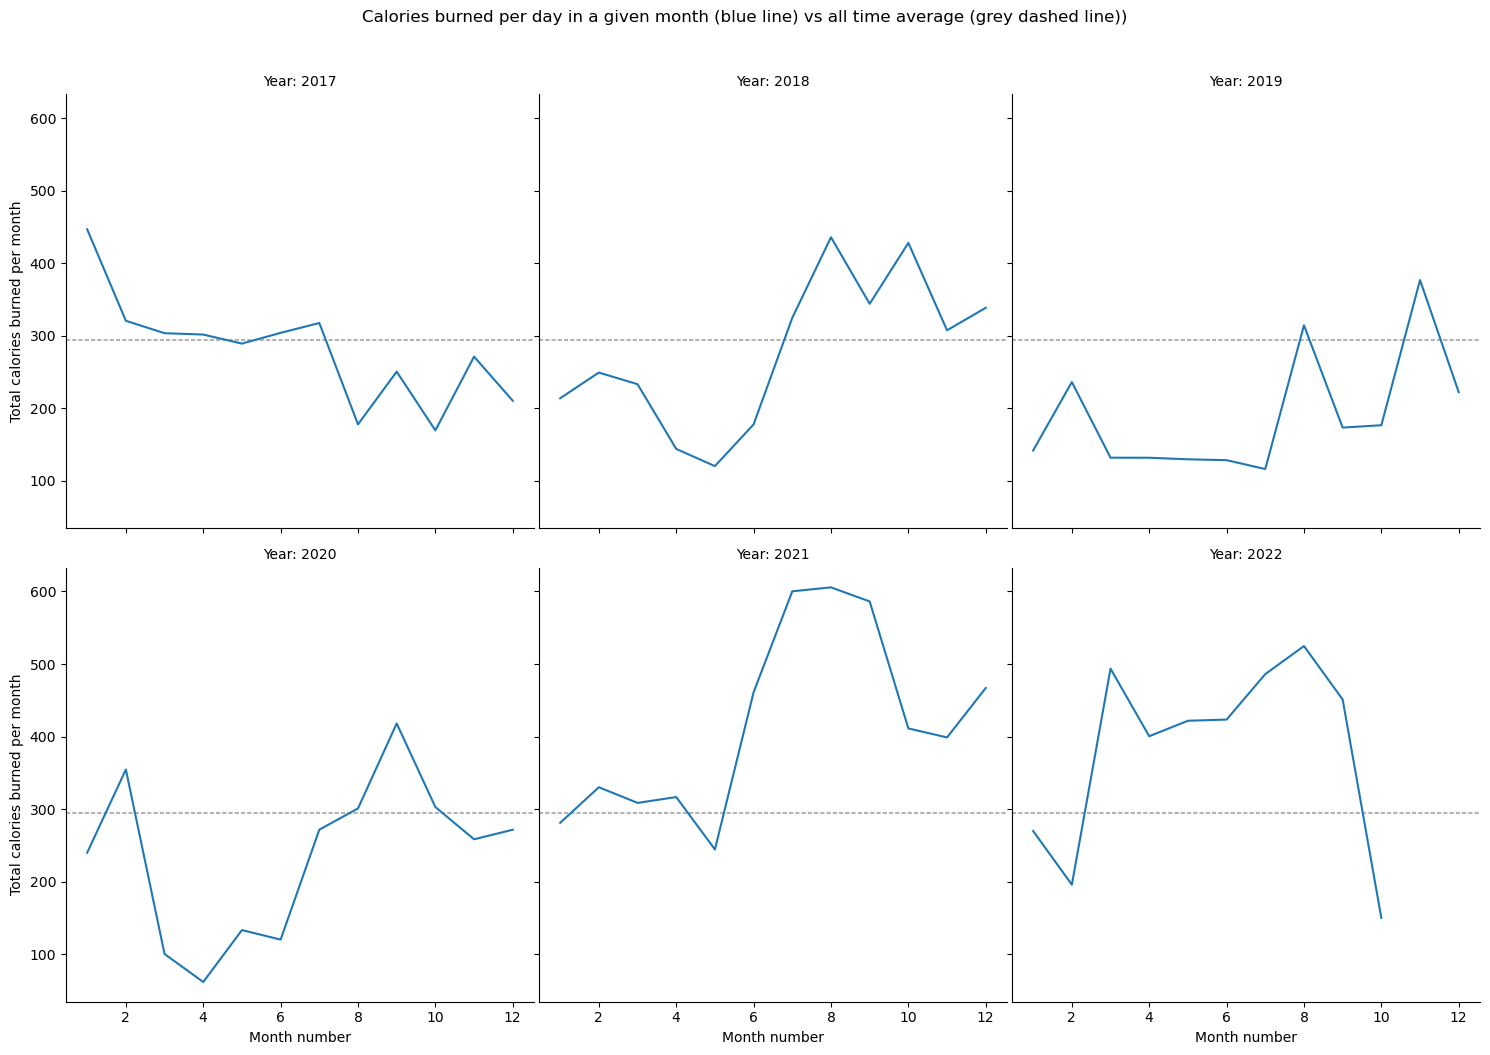

In [10]:
# Lineplot to see the evolution
g = sns.relplot(data=calories_df, x="month_number", y="cal_avg_day", 
            col = "year", kind = "line", markers = True, col_wrap= 3, palette = "blue") 

(g.map(plt.axhline, y=calories_df["cal_avg_day"].mean(), color=".7", dashes=(2, 1), zorder=0)
  .set_axis_labels("Month number", "Total calories burned per month")
  .set_titles("Year: {col_name}")
  .tight_layout(w_pad=0))

g.fig.suptitle('Calories burned per day in a given month (blue line) vs all time average (grey dashed line))', y=1.05)
plt.show()

## 4.2. Walking is my main cause of burned calories <a class="anchor" id="4.2"></a>

In [11]:
# Objective: Find how much each type of exercise contributes to calories burned
calories_df.columns = ['year', 'month_number', 'max_day', 'RUN_WALK', 'SWIM_DANCE', 'TOTAL', 
                       'AVG_RUN_WALK', 'AVG_SWIM_DANCE', 'AVG']

calories_long_df = calories_df.melt(["year", "month_number", "max_day"], var_name='Category', value_name='Calories')
calories_long_df[(calories_long_df["year"]==2022) & (calories_long_df["month_number"]==10)]

,year,month_number,max_day,Category,Calories
69,2022,10,31,RUN_WALK,3177.349779
139,2022,10,31,SWIM_DANCE,1469.052333
209,2022,10,31,TOTAL,4646.402112
279,2022,10,31,AVG_RUN_WALK,102.495154
349,2022,10,31,AVG_SWIM_DANCE,47.388785
419,2022,10,31,AVG,149.883939


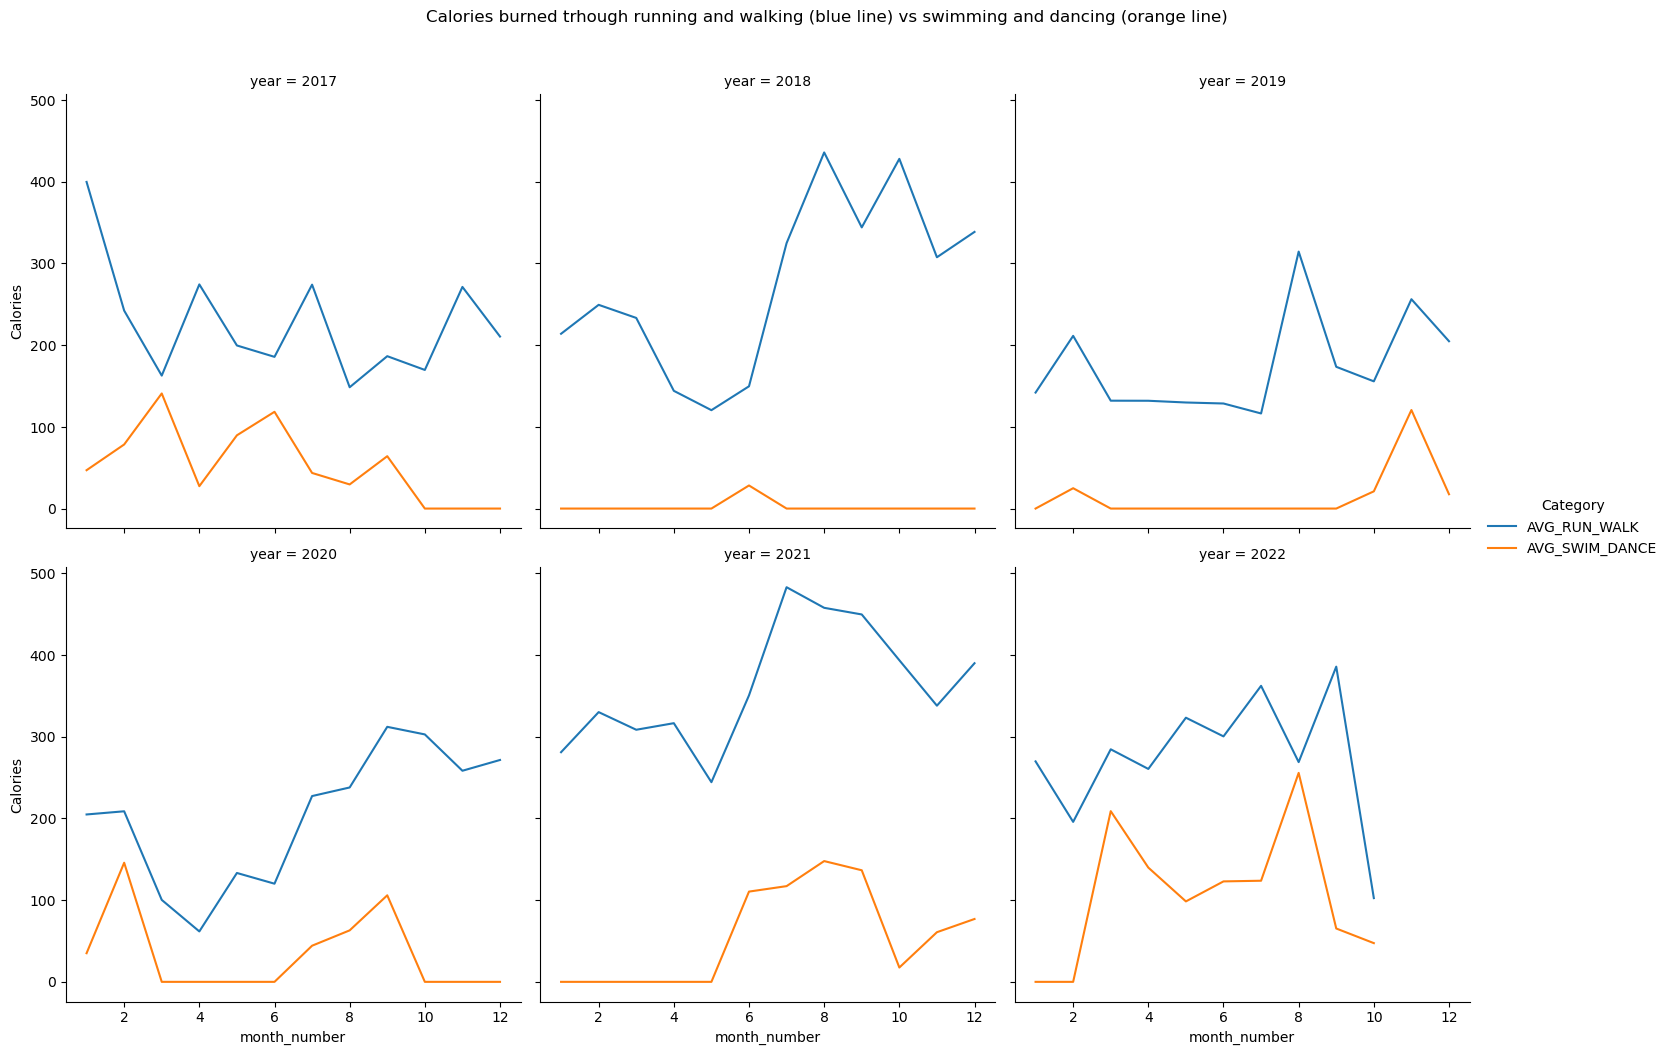

In [12]:
# Line plot
g = sns.relplot(data=calories_long_df[calories_long_df["Category"].isin(["AVG_RUN_WALK", "AVG_SWIM_DANCE"])],
            x="month_number", y="Calories", hue = "Category",
            col = "year", kind = "line", markers = True, col_wrap= 3) 

g.fig.suptitle('Calories burned trhough running and walking (blue line) vs swimming and dancing (orange line)', y=1.05)
plt.show()